In [21]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [23]:
# Add the latitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [24]:
coordinates

[(38.35802469549748, -126.6814454309802),
 (14.53775464764081, 24.54787405004592),
 (73.20843673004217, -152.71582966022672),
 (-5.053042163842704, 171.39567601067472),
 (84.59219537277954, 81.01925130759645),
 (31.03800484670451, 42.02446000522332),
 (21.537081042832895, -1.831948798483296),
 (17.776881024080254, -133.70435857119824),
 (-31.98473646150314, 149.6464582223196),
 (-87.94220533437316, 17.634364949121533),
 (31.776499643763955, 14.471766330625087),
 (38.89334068053515, 26.255623264345502),
 (-64.66813276871032, -118.59739713838044),
 (-5.505069647719267, -56.00697672978349),
 (-22.447677914470646, 152.94551119929304),
 (-54.4054631549469, 105.82284232833439),
 (-67.99240744984473, 170.3926229440471),
 (46.521817028371885, 135.7533200547848),
 (70.31021073655785, -146.4434242183154),
 (-50.3939034346906, 148.00036174829154),
 (-27.99507070553927, 27.200663290878566),
 (53.486637459360054, 170.03326186330355),
 (46.818248437812514, 120.11033052573174),
 (-4.333647224689713, 

In [30]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [31]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [36]:
# Importing requests library 
import requests

# Imoort the API Key
from config import weather_api_key

In [37]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a30f28f702c3ba9fbba118ec44a722c


In [38]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [43]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 28 of Set 25 | fortuna
Processing Record 29 of Set 25 | kutum
Processing Record 30 of Set 25 | barrow
Processing Record 31 of Set 25 | lolua
City not found. Skipping...
Processing Record 32 of Set 25 | dikson
Processing Record 33 of Set 25 | sakakah
Processing Record 34 of Set 25 | taoudenni
Processing Record 35 of Set 25 | lompoc
Processing Record 36 of Set 25 | mudgee
Processing Record 37 of Set 25 | bredasdorp
Processing Record 38 of Set 25 | bani walid
Processing Record 39 of Set 25 | plomarion
Processing Record 40 of Set 25 | rikitea
Processing Record 41 of Set 25 | itaituba
Processing Record 42 of Set 25 | gladstone
Processing Record 43 of Set 25 | busselton
Processing Record 44 of Set 25 | bluff
Processing Record 45 of Set 25 | vostok
Processing Record 46 of Set 25 | fairbanks
Processing Record 47 of Set 25 | hobart
Processing Record 48 of Set 25 | ventersburg
Processing Record 49 of Set 25 | nikolskoye
Processing Record 50 of Set 25 | wulanhaote
City not found

Processing Record 30 of Set 28 | vaitupu
City not found. Skipping...
Processing Record 31 of Set 28 | antanifotsy
Processing Record 32 of Set 28 | cap malheureux
Processing Record 33 of Set 28 | alofi
Processing Record 34 of Set 28 | ulaanbaatar
Processing Record 35 of Set 28 | mar del plata
Processing Record 36 of Set 28 | kodiak
Processing Record 37 of Set 28 | muros
Processing Record 38 of Set 28 | leua
Processing Record 39 of Set 28 | gat
Processing Record 40 of Set 28 | honningsvag
Processing Record 41 of Set 28 | tasiilaq
Processing Record 42 of Set 28 | dutse
Processing Record 43 of Set 28 | kavieng
Processing Record 44 of Set 28 | ozinki
Processing Record 45 of Set 28 | ixtapa
Processing Record 46 of Set 28 | camalu
Processing Record 47 of Set 28 | illoqqortoormiut
City not found. Skipping...
Processing Record 48 of Set 28 | plettenberg bay
Processing Record 49 of Set 28 | tautira
Processing Record 50 of Set 28 | shingu
Processing Record 1 of Set 29 | half moon bay
Processing R

Processing Record 18 of Set 32 | bubaque
Processing Record 19 of Set 32 | alakurtti
Processing Record 20 of Set 32 | bonavista
Processing Record 21 of Set 32 | donja orahovica
City not found. Skipping...
Processing Record 22 of Set 32 | alekseyevsk
Processing Record 23 of Set 32 | quelimane
Processing Record 24 of Set 32 | skjervoy
Processing Record 25 of Set 32 | tingrela
City not found. Skipping...
Processing Record 26 of Set 32 | killybegs
Processing Record 27 of Set 32 | henties bay
Processing Record 28 of Set 32 | matara
Processing Record 29 of Set 32 | khed brahma
Processing Record 30 of Set 32 | zyryanovsk
Processing Record 31 of Set 32 | talnakh
Processing Record 32 of Set 32 | tawkar
City not found. Skipping...
Processing Record 33 of Set 32 | westport
Processing Record 34 of Set 32 | lujan
Processing Record 35 of Set 32 | victoria
Processing Record 36 of Set 32 | esna
Processing Record 37 of Set 32 | salalah
Processing Record 38 of Set 32 | ures
Processing Record 39 of Set 32

Processing Record 2 of Set 36 | charters towers
Processing Record 3 of Set 36 | cazaje
City not found. Skipping...
Processing Record 4 of Set 36 | hammerfest
Processing Record 5 of Set 36 | nadym
Processing Record 6 of Set 36 | damaturu
Processing Record 7 of Set 36 | lagoa
Processing Record 8 of Set 36 | lasa
Processing Record 9 of Set 36 | houston
Processing Record 10 of Set 36 | eldikan
City not found. Skipping...
Processing Record 11 of Set 36 | yumen
Processing Record 12 of Set 36 | vila velha
Processing Record 13 of Set 36 | keti bandar
Processing Record 14 of Set 36 | arlit
Processing Record 15 of Set 36 | diffa
Processing Record 16 of Set 36 | riyadh
Processing Record 17 of Set 36 | moron
Processing Record 18 of Set 36 | rabo de peixe
Processing Record 19 of Set 36 | sosnovo-ozerskoye
Processing Record 20 of Set 36 | valley
Processing Record 21 of Set 36 | palabuhanratu
City not found. Skipping...
Processing Record 22 of Set 36 | kiama
Processing Record 23 of Set 36 | elizabeth

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,59.00,72,1,6.91,US,2021-04-23 21:59:22
1,Kutum,14.2000,24.6667,79.65,17,60,9.35,SD,2021-04-23 21:59:22
2,Barrow,71.2906,-156.7887,19.40,79,1,3.44,US,2021-04-23 21:59:22
3,Dikson,73.5069,80.5464,32.20,97,100,18.57,RU,2021-04-23 21:59:23
4,Sakakah,29.9697,40.2064,78.80,11,0,8.05,SA,2021-04-23 21:59:23
5,Taoudenni,22.6783,-3.9836,91.27,6,0,9.64,ML,2021-04-23 21:59:24
6,Lompoc,34.6391,-120.4579,61.00,59,0,9.22,US,2021-04-23 21:59:24
7,Mudgee,-32.5943,149.5871,32.00,100,99,1.95,AU,2021-04-23 21:59:24
8,Bredasdorp,-34.5322,20.0403,50.00,93,97,3.44,ZA,2021-04-23 21:59:25
9,Bani Walid,31.7566,13.9942,59.83,80,52,23.29,LY,2021-04-23 21:59:25


In [48]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [50]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1619239804.945506

In [51]:
today = time.strftime("%x")
today

'04/23/21'

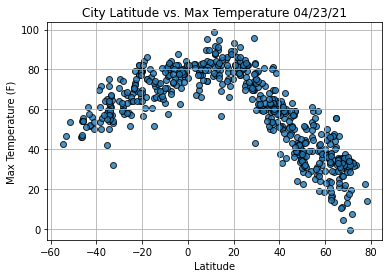

In [52]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

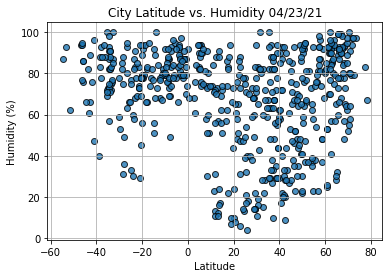

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

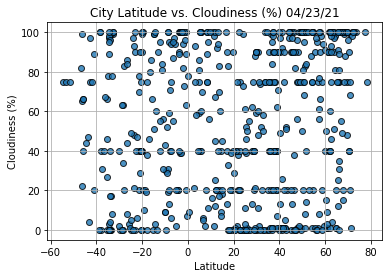

In [54]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

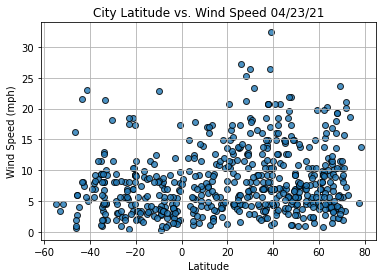

In [55]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()